In [1]:
import pandas as pd
import numpy as np 

import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier




import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
df=pd.read_csv("./diabetes.csv")
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)
X_train, X_test,y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.30,
                                                 random_state=42)


In [21]:
# Modeli oluştur
gbm_model = GradientBoostingClassifier()

# Modeli eğit
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        /opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    multinomial deviance, the same 

In [25]:
y_pred=gbm_model.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7489177489177489

In [30]:
gbm_model = GradientBoostingClassifier()

In [40]:
gbm_params={"n_estimators":[100,300,500,1000],
           "learning_rate":[0.1,0.01,0.001,0.01],
          "max_depth":[2,3,5,8]}

gbm_cv_model = GridSearchCV(estimator=gbm_model, param_grid=gbm_params, cv=10, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

In [43]:
gbm_cv_model = GridSearchCV(estimator=gbm_model, param_grid=gbm_params, cv=10, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.01],
                         'max_depth': [2, 3, 5, 8],
                         'n_estimators': [100, 300, 500, 1000]},
             verbose=2)

In [44]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
#final model

In [47]:
gbm_tuned=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,
                                     n_estimators=500).fit(X_train, y_train)

In [49]:
y_pred=gbm_tuned.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [ ]:
#değisken önem

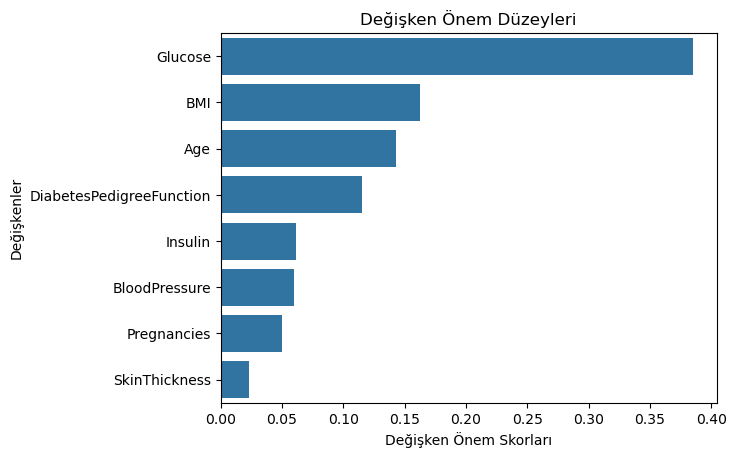

In [55]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()